In [1]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [2]:
import pandas as pd
df1 = pd.read_csv('Medical_Image_Data_01.csv', encoding='cp949')
df2 = pd.read_csv('Patient_Diagnosis_Data.csv')
df3 = pd.read_csv('Patient_Surgery_Data.csv')
df1.isnull().sum()

환자ID                0
전방디스크높이(mm)         0
후방디스크높이(mm)         0
지방축적도               3
Instability         0
MF + ES             0
Modic change        0
PI                  4
PT                  4
Seg Angle(raw)      1
Vaccum disc         0
골밀도               896
디스크단면적              1
디스크위치               0
척추이동척도              0
척추전방위증              0
dtype: int64

In [3]:
df2.isnull().sum()

환자ID                         0
Large Lymphocyte             0
Location of herniation       0
ODI                       1432
가족력                         51
간질성폐질환                       0
고혈압여부                        0
과거수술횟수                       0
당뇨여부                         0
말초동맥질환여부                     0
빈혈여부                         0
성별                           0
스테로이드치료                      0
신부전여부                        0
신장                           0
심혈관질환                        0
암발병여부                        0
연령                           0
우울증여부                        0
입원기간                         0
입원일자                         0
종양진행여부                       0
직업                         415
체중                           0
퇴원일자                         0
헤모글로빈수치                      1
혈전합병증여부                      0
환자통증정도                       0
흡연여부                         0
통증기간(월)                      4
dtype: int64

In [4]:
df3.isnull().sum()

환자ID        0
수술기법       81
수술시간       54
수술실패여부      0
수술일자        0
신장          0
연령          0
입원일자        0
재발여부        0
체중          0
퇴원일자        0
헤모글로빈수치     1
환자통증정도      0
통증기간(월)     4
혈액형         0
dtype: int64

In [5]:
import matplotlib.pyplot as plt
import matplotlib

plt.rc('font', family='NanumBarunGothic')
matplotlib.rc('axes',unicode_minus=False)

In [6]:
merge1 = pd.merge(df1, df2, on='환자ID', how='inner')
final = pd.merge(merge1, df3, on=['환자ID','연령', '입원일자', '신장', '체중', '퇴원일자', '헤모글로빈수치', '환자통증정도', '통증기간(월)'],how='inner')
final.columns

Index(['환자ID', '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증', 'Large Lymphocyte',
       'Location of herniation', 'ODI', '가족력', '간질성폐질환', '고혈압여부', '과거수술횟수',
       '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별', '스테로이드치료', '신부전여부', '신장', '심혈관질환',
       '암발병여부', '연령', '우울증여부', '입원기간', '입원일자', '종양진행여부', '직업', '체중', '퇴원일자',
       '헤모글로빈수치', '혈전합병증여부', '환자통증정도', '흡연여부', '통증기간(월)', '수술기법', '수술시간',
       '수술실패여부', '수술일자', '재발여부', '혈액형'],
      dtype='object')

In [7]:
final['SS']=final['PI']-final['PT']
final['SS']

0       15.0
1       33.6
2       40.2
3       30.5
4       44.1
        ... 
1889    36.5
1890    27.5
1891    29.6
1892    21.1
1893    32.1
Name: SS, Length: 1894, dtype: float64

<AxesSubplot:ylabel='Frequency'>

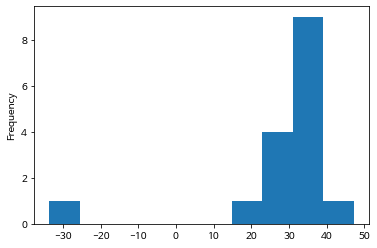

In [8]:
final[final['척추이동척도']=='Extremely up']['SS'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

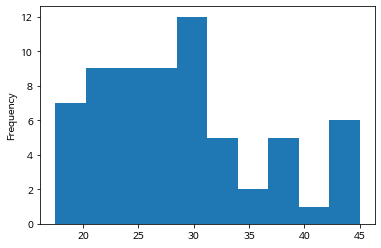

In [9]:
final[final['척추이동척도']=='Up']['SS'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

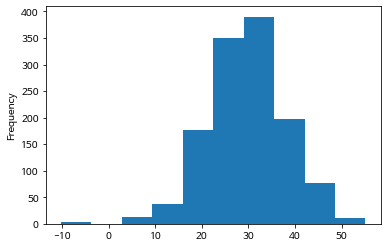

In [10]:
final[(final['척추이동척도']=='Middle')&(final['SS']<400)]['SS'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

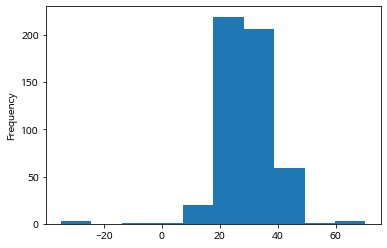

In [11]:
final[final['척추이동척도']=='Down']['SS'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

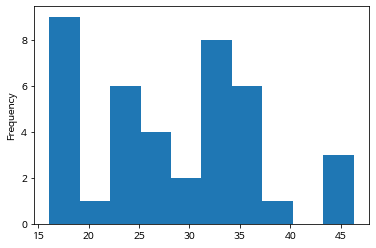

In [12]:
final[final['척추이동척도']=='Extremely down']['SS'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

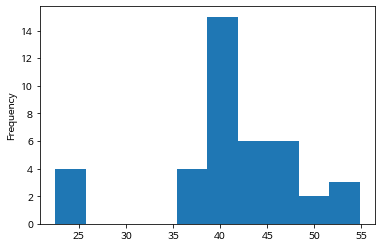

In [13]:
final[final['척추이동척도']=='Extremely down']['PI'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

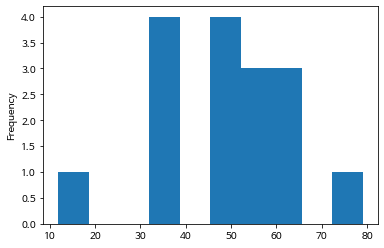

In [14]:
final[final['척추이동척도']=='Extremely up']['PI'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

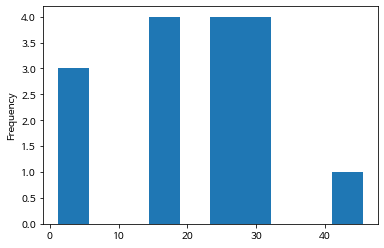

In [15]:
final[final['척추이동척도']=='Extremely up']['PT'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

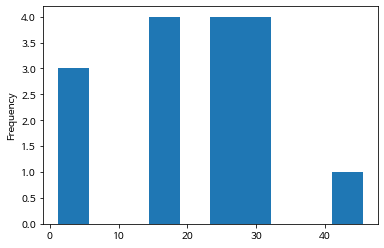

In [16]:
final[final['척추이동척도']=='Extremely up']['PT'].plot.hist()

,전방디스크높이(mm),후방디스크높이(mm)
120,12.3,101.0
590,12.3,101.0
1184,12.3,101.0


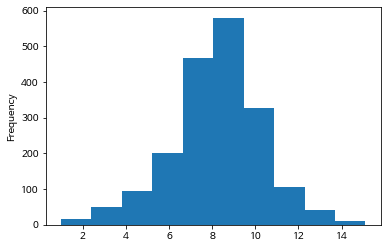

In [17]:
# 후방디스크 높이 100넘는거 이상치? -> 이상치 빼고 plot하면 이거
final[final['후방디스크높이(mm)']<=100]['후방디스크높이(mm)'].plot.hist()
final[final['후방디스크높이(mm)']>100][['전방디스크높이(mm)','후방디스크높이(mm)']]

<AxesSubplot:ylabel='Frequency'>

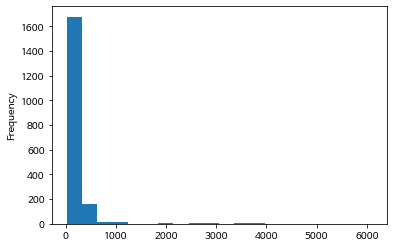

In [18]:
# 지방축적도 12000넘는거 이상치? -> 이상치 빼고 plot하면 이거
final[final['지방축적도']<=12000]['지방축적도'].plot.hist(bins=20)

In [19]:
final[final['PI']<final['PT']][['PI','PT']]

,PI,PT
122,14.0,48.7
312,33.0,43.2
592,14.0,48.7
782,33.0,43.2
1009,11.9,45.5
1190,14.0,48.7
1437,28.6,36.5
1578,33.0,43.2


In [20]:
len(df1[df1['디스크위치']>5]['디스크위치'])

25

In [21]:
final[final['PI']>90]['PT']

275     23.8
745     23.8
1519    23.8
Name: PT, dtype: float64

In [22]:
final[final['Seg Angle(raw)']<90]['Seg Angle(raw)'].describe()

count    1890.000000
mean       15.050296
std         8.557439
min       -27.400000
25%         8.800000
50%        14.500000
75%        21.100000
max        59.400000
Name: Seg Angle(raw), dtype: float64

<AxesSubplot:ylabel='Frequency'>

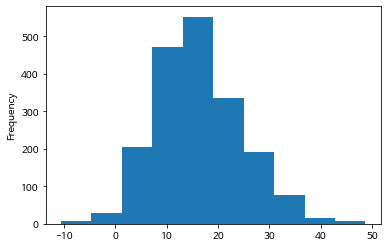

In [23]:
final['PT'].plot.hist()

In [24]:
final[final['Seg Angle(raw)']>90]

,환자ID,전방디스크높이(mm),후방디스크높이(mm),지방축적도,Instability,MF + ES,Modic change,PI,PT,Seg Angle(raw),...,환자통증정도,흡연여부,통증기간(월),수술기법,수술시간,수술실패여부,수술일자,재발여부,혈액형,SS
64,65PT,15.2,10.6,162.8,0,2941.4,0,43.7,18.8,165.0,...,8,0,2.0,TELD,86.0,0,20190216,0,RH+A,24.9
534,535PT,15.2,10.6,162.8,0,2941.4,0,43.7,18.8,165.0,...,8,0,1.0,TELD,102.0,0,20190114,0,RH+A,24.9
1080,1081PT,15.2,10.6,162.8,0,2941.4,0,43.7,18.8,165.0,...,8,1,0.5,TELD,45.0,0,20090428,0,RH+O,24.9


<AxesSubplot:>

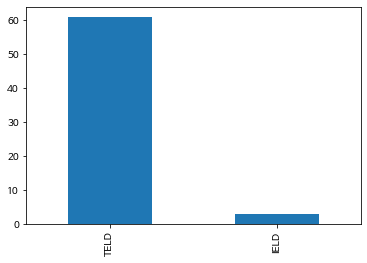

In [25]:

pd.value_counts(final[final['척추이동척도'] == 'Up']['수술기법'].values).plot.bar()

<AxesSubplot:>

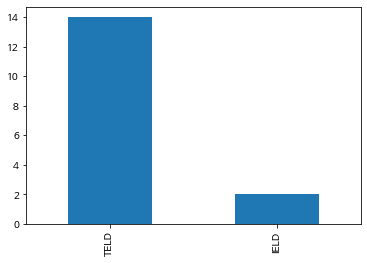

In [26]:

pd.value_counts(final[final['척추이동척도'] == 'Extremely up']['수술기법'].values).plot.bar()

<AxesSubplot:>

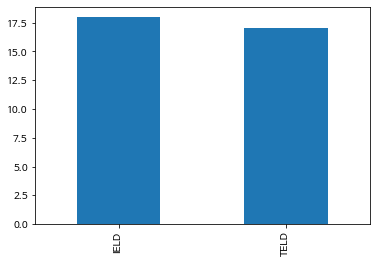

In [27]:

pd.value_counts(final[final['척추이동척도'] == 'Extremely down']['수술기법'].values).plot.bar()

<AxesSubplot:>

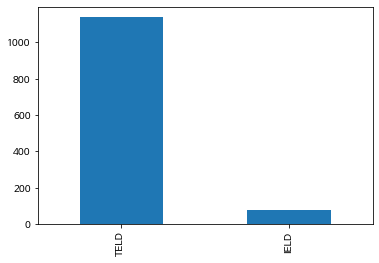

In [28]:

pd.value_counts(final[final['척추이동척도'] == 'Middle']['수술기법'].values).plot.bar()

In [29]:
#teld, 재발
a = len(final[(final['수술실패여부']==0) & (final['수술기법']=='IELD')]) /len(final[final['수술기법']=='IELD']) 
b = len(final[(final['수술실패여부']==0) & (final['수술기법']=='TELD')]) /len(final[final['수술기법']=='TELD']) 
a,b
# pd.value_counts(final[final['수술실패여부'] == 1]['수술기법'].values).plot.bar()

(0.9285714285714286, 0.9390316796174537)

<AxesSubplot:ylabel='Frequency'>

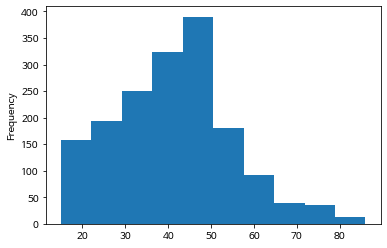

In [30]:
final[final['수술기법']=='TELD']['연령'].plot.hist()

Text(0.5, 95.9999999999999, '디스크단면적')

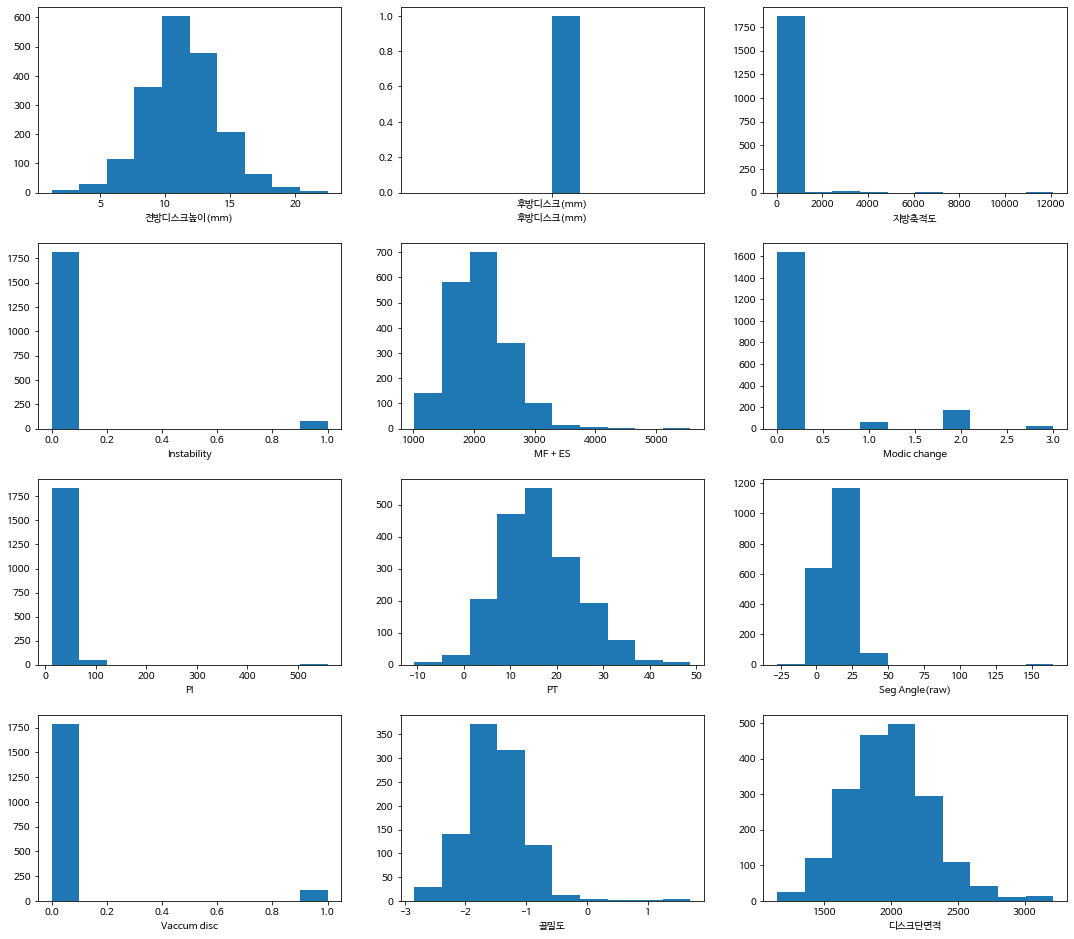

In [31]:
fig,axes = plt.subplots(nrows = 4, ncols = 3, figsize = (15,13))
plt.tight_layout(w_pad=3, h_pad = 3)
axes[0,0].hist('전방디스크높이(mm)',data = final)
axes[0,0].set_xlabel('전방디스크높이(mm)',fontsize = 10)
axes[0,1].hist('후방디스크(mm)',data = final)
axes[0,1].set_xlabel('후방디스크(mm)',fontsize = 10)
axes[0,2].hist('지방축적도',data = final)
axes[0,2].set_xlabel('지방축적도',fontsize = 10)
axes[1,0].hist('Instability',data = final) # 범주형
axes[1,0].set_xlabel('Instability',fontsize = 10)
axes[1,1].hist('MF + ES',data = final)
axes[1,1].set_xlabel('MF + ES',fontsize = 10)
axes[1,2].hist('Modic change',data = final) # 범주형
axes[1,2].set_xlabel('Modic change',fontsize = 10)
axes[2,0].hist('PI',data = final)
axes[2,0].set_xlabel('PI',fontsize = 10)
axes[2,1].hist('PT',data = final)
axes[2,1].set_xlabel('PT',fontsize = 10)
axes[2,2].hist('Seg Angle(raw)',data = final)
axes[2,2].set_xlabel('Seg Angle(raw)',fontsize = 10)
axes[3,0].hist('Vaccum disc',data = final) # 범주형
axes[3,0].set_xlabel('Vaccum disc',fontsize = 10)
axes[3,1].hist('골밀도',data = final)
axes[3,1].set_xlabel('골밀도',fontsize = 10)
axes[3,2].hist('디스크단면적',data = final)
axes[3,2].set_xlabel('디스크단면적',fontsize = 10)

Text(0.5, 95.9999999999999, '말초동맥질환여부')

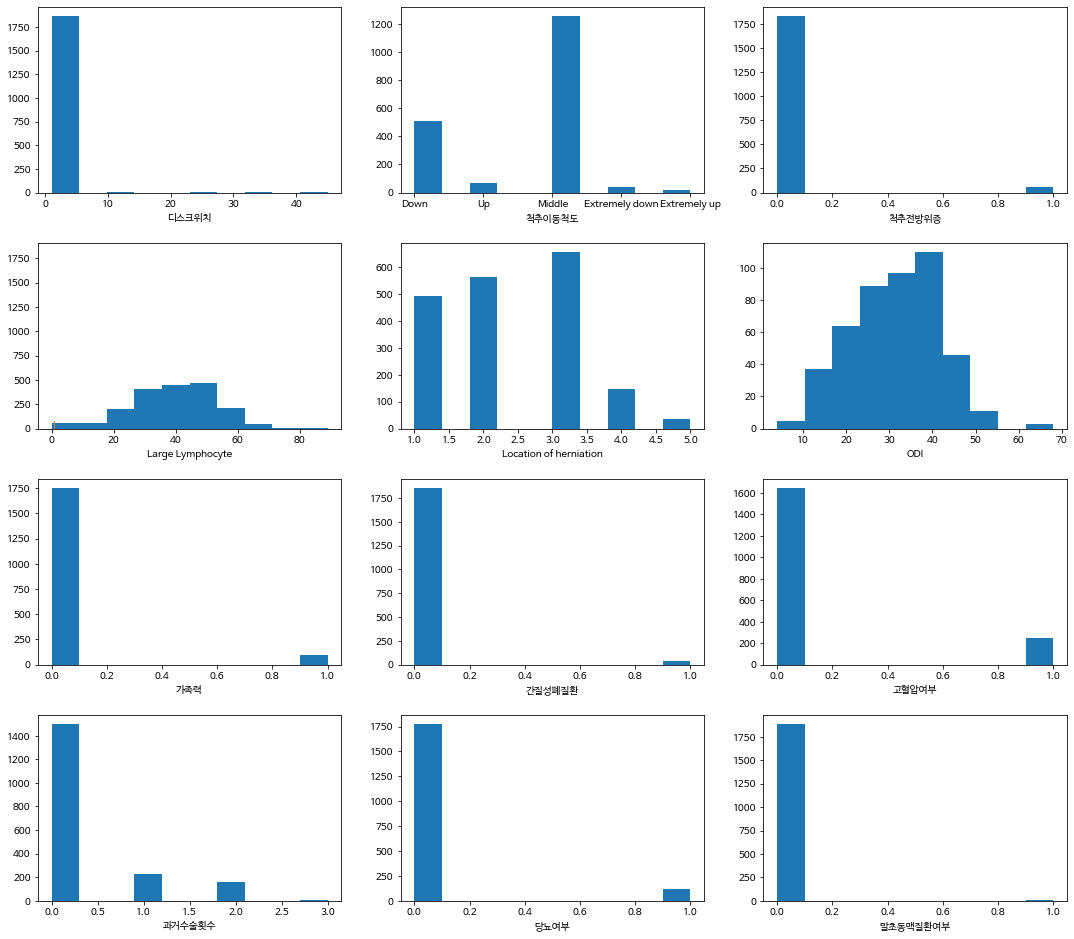

In [32]:



fig,axes = plt.subplots(nrows = 4, ncols = 3, figsize = (15,13))
plt.tight_layout(w_pad=3, h_pad = 3)
axes[0,0].hist('디스크위치',data = final)
axes[0,0].set_xlabel('디스크위치',fontsize = 10)

axes[0,1].hist('척추이동척도',data = final) # 범주형
axes[0,1].set_xlabel('척추이동척도',fontsize = 10)

axes[0,2].hist('척추전방위증',data = final) # 범주형
axes[0,2].set_xlabel('척추전방위증',fontsize = 10)

axes[1,0].hist('Large Lymphocyte',data = final)
axes[1,0].set_xlabel('Large Lymphocyte',fontsize = 10)

axes[1,1].hist('Location of herniation',data = final) # 범주형
axes[1,1].set_xlabel('Location of herniation',fontsize=10)
axes[1,0].hist('Instability',data = final) # 범주형ize = 10)

axes[1,2].hist('ODI',data = final)
axes[1,2].set_xlabel('ODI',fontsize = 10)

axes[2,0].hist('가족력',data = final) # 범주형
axes[2,0].set_xlabel('가족력',fontsize = 10)
axes[2,1].hist('간질성폐질환',data = final) # 범주형
axes[2,1].set_xlabel('간질성폐질환',fontsize = 10)
axes[2,2].hist('고혈압여부',data = final) # 범주형
axes[2,2].set_xlabel('고혈압여부',fontsize = 10)
axes[3,0].hist('과거수술횟수',data = final) # 범주형
axes[3,0].set_xlabel('과거수술횟수',fontsize = 10)
axes[3,1].hist('당뇨여부',data = final) # 범주형
axes[3,1].set_xlabel('당뇨여부',fontsize = 10)

axes[3,2].hist('말초동맥질환여부',data = final) # 범주형
axes[3,2].set_xlabel('말초동맥질환여부',fontsize = 10)


In [33]:
final[final['입원기간']>20]['입원기간']

1371    44
1382    27
1431    46
1859    51
Name: 입원기간, dtype: int64

Text(0.5, 95.9999999999999, '입원일자')

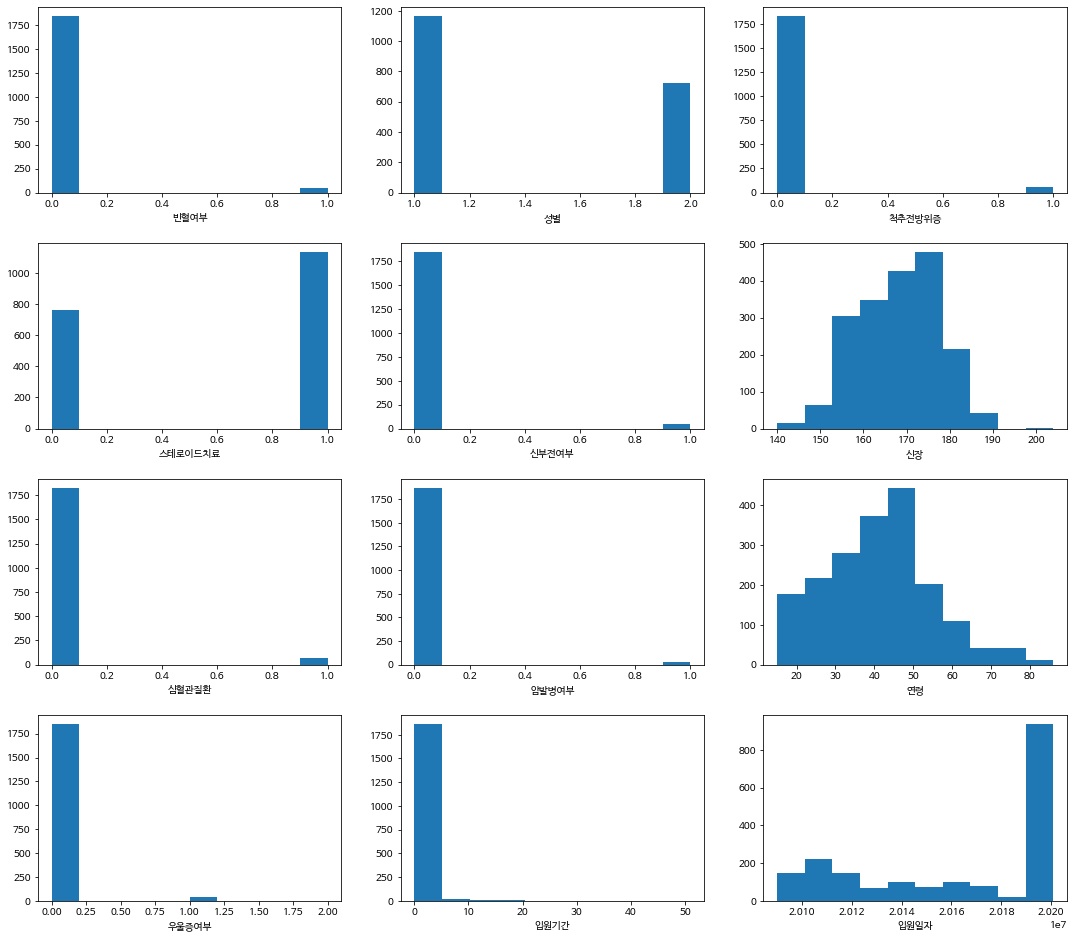

In [34]:


fig,axes = plt.subplots(nrows = 4, ncols = 3, figsize = (15,13))
plt.tight_layout(w_pad=3, h_pad = 3)
axes[0,0].hist('빈혈여부',data = final) # 범주형
axes[0,0].set_xlabel('빈혈여부',fontsize = 10)

axes[0,1].hist('성별',data = final) # 범주형
axes[0,1].set_xlabel('성별',fontsize = 10)

axes[0,2].hist('척추전방위증',data = final) # 범주형
axes[0,2].set_xlabel('척추전방위증',fontsize = 10)

axes[1,0].hist('스테로이드치료',data = final) # 범주형
axes[1,0].set_xlabel('스테로이드치료',fontsize = 10)

axes[1,1].hist('신부전여부',data = final) # 범주형
axes[1,1].set_xlabel('신부전여부',fontsize = 10)

axes[1,2].hist('신장',data = final)
axes[1,2].set_xlabel('신장',fontsize = 10)

axes[2,0].hist('심혈관질환',data = final) # 범주형
axes[2,0].set_xlabel('심혈관질환',fontsize = 10)
axes[2,1].hist('암발병여부',data = final) # 범주형
axes[2,1].set_xlabel('암발병여부',fontsize = 10)
axes[2,2].hist('연령',data = final) 
axes[2,2].set_xlabel('연령',fontsize = 10)
axes[3,0].hist('우울증여부',data = final) # 범주형
axes[3,0].set_xlabel('우울증여부',fontsize = 10)
axes[3,1].hist('입원기간',data = final) 
axes[3,1].set_xlabel('입원기간',fontsize = 10)

axes[3,2].hist('입원일자',data = final) 
axes[3,2].set_xlabel('입원일자',fontsize = 10)


Text(0.5, 95.9999999999999, '수술실패여부')

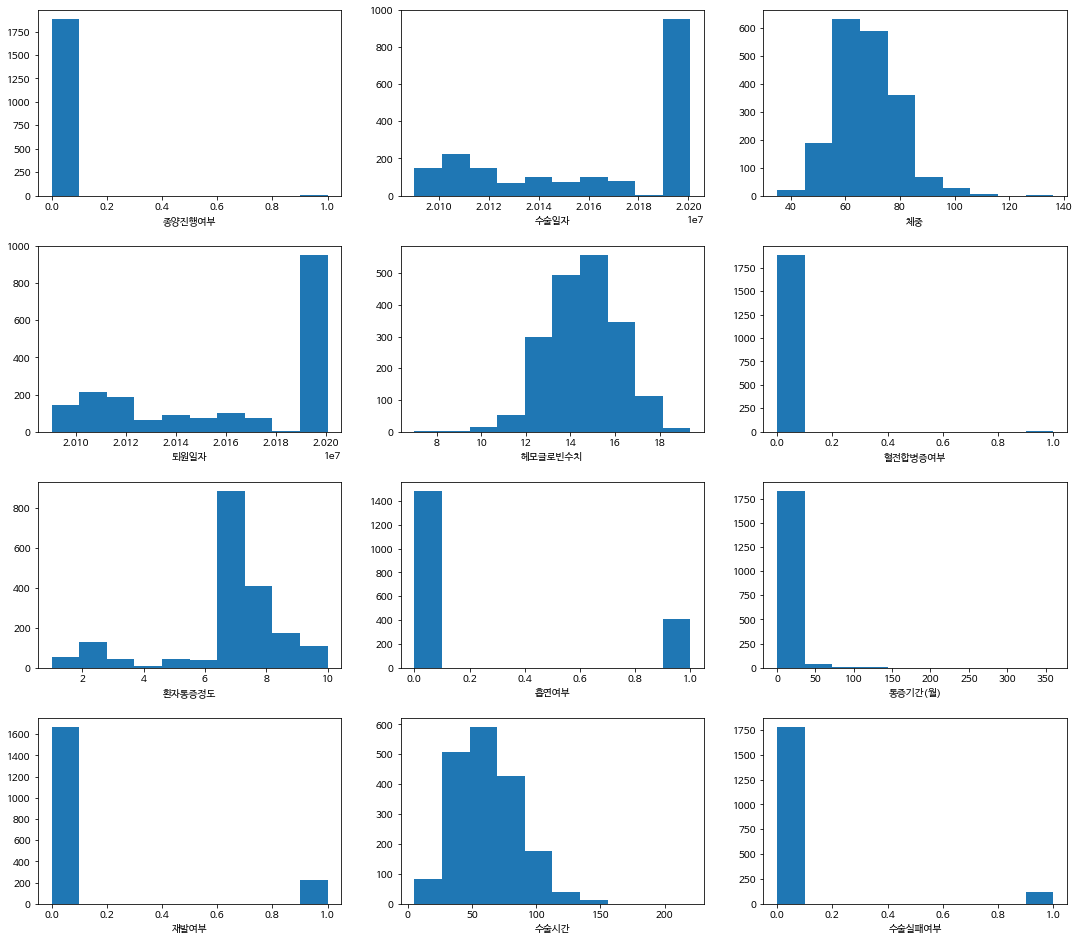

In [35]:


fig,axes = plt.subplots(nrows = 4, ncols = 3, figsize = (15,13))
plt.tight_layout(w_pad=3, h_pad = 3)
axes[0,0].hist('종양진행여부',data = final) # 범주형
axes[0,0].set_xlabel('종양진행여부',fontsize = 10)

axes[0,1].hist('수술일자',data = final) 
axes[0,1].set_xlabel('수술일자',fontsize = 10)

axes[0,2].hist('체중',data = final) 
axes[0,2].set_xlabel('체중',fontsize = 10)

axes[1,0].hist('퇴원일자',data = final) 
axes[1,0].set_xlabel('퇴원일자',fontsize = 10)

axes[1,1].hist('헤모글로빈수치',data = final) 
axes[1,1].set_xlabel('헤모글로빈수치',fontsize = 10)

axes[1,2].hist('혈전합병증여부',data = final) # 범주형
axes[1,2].set_xlabel('혈전합병증여부',fontsize = 10)

axes[2,0].hist('환자통증정도',data = final) # 범주형
axes[2,0].set_xlabel('환자통증정도',fontsize = 10)
axes[2,1].hist('흡연여부',data = final) # 범주형
axes[2,1].set_xlabel('흡연여부',fontsize = 10)
axes[2,2].hist('통증기간(월)',data = final) 
axes[2,2].set_xlabel('통증기간(월)',fontsize = 10)
axes[3,0].hist('재발여부',data = final) # 범주형
axes[3,0].set_xlabel('재발여부',fontsize = 10)
axes[3,1].hist('수술시간',data = final) 
axes[3,1].set_xlabel('수술시간',fontsize = 10)

axes[3,2].hist('수술실패여부',data = final) # 범주형
axes[3,2].set_xlabel('수술실패여부',fontsize = 10)


In [36]:
len(final[final['수술실패여부'] == 1])

115

<AxesSubplot:>

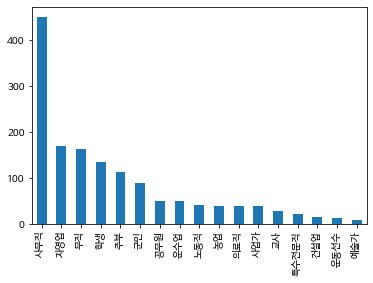

In [37]:
pd.value_counts(final['직업'].values).plot.bar()

<AxesSubplot:>

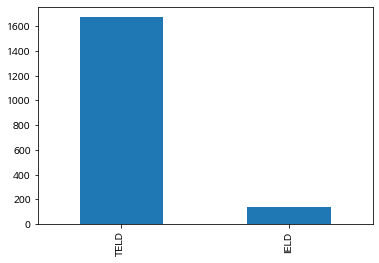

In [38]:
pd.value_counts(final['수술기법'].values).plot.bar()

<AxesSubplot:>

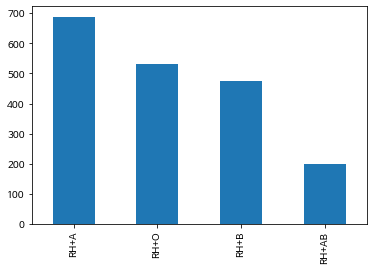

In [39]:
pd.value_counts(final['혈액형'].values).plot.bar()

In [40]:
final['골밀도'].isnull().sum()

896

<AxesSubplot:>

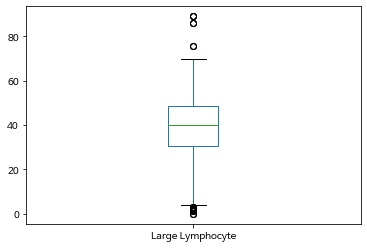

In [41]:
df2['Large Lymphocyte'].plot.box()

In [42]:
df2[df2['Location of herniation']<=0]

,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,...,입원일자,종양진행여부,직업,체중,퇴원일자,헤모글로빈수치,혈전합병증여부,환자통증정도,흡연여부,통증기간(월)


In [43]:
df2.describe().loc[:,'Large Lymphocyte':'연령']

,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,빈혈여부,성별,스테로이드치료,신부전여부,신장,심혈관질환,암발병여부,연령
count,1894.000000,1894.000000,462.000000,1843.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000,1894.000000
mean,39.270750,2.295671,31.142857,0.049919,0.020063,0.130940,0.302534,0.062830,0.004224,0.024287,1.383316,0.598733,0.025343,168.027983,0.035903,0.013728,41.463569
std,13.675874,0.996143,10.131304,0.217836,0.140254,0.337424,0.638461,0.242721,0.064871,0.153980,0.486323,0.490284,0.157207,9.211419,0.186097,0.116388,13.444629
min,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,140.000000,0.000000,0.000000,15.000000
25%,30.700000,1.000000,24.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,161.000000,0.000000,0.000000,32.000000
50%,40.200000,2.000000,31.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,169.000000,0.000000,0.000000,41.000000
75%,48.600000,3.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,175.000000,0.000000,0.000000,49.000000
max,89.000000,5.000000,68.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,204.000000,1.000000,1.000000,86.000000


In [44]:
df2['가족력'].unique()

array([ 0.,  1., nan])

In [45]:
df2['Location of herniation'].unique()

array([3, 4, 2, 5, 1])

In [46]:
df2['간질성폐질환'].unique()

array([0, 1])

In [47]:
df2['고혈압여부'].unique()

array([0, 1])

In [48]:
df2['과거수술횟수'].unique()

array([0, 1, 2, 3])

In [49]:
df2['당뇨여부'].unique()

array([0, 1])

In [50]:
df2['말초동맥질환여부'].unique()

array([0, 1])

In [51]:
df2['빈혈여부'].unique()

array([0, 1])

In [52]:
df2['성별'].unique()

array([2, 1])

In [53]:
df2['스테로이드치료'].unique()

array([1, 0])

In [54]:
df2['신부전여부'].unique()

array([0, 1])

<AxesSubplot:>

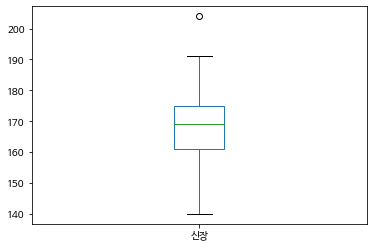

In [55]:

df2['신장'].plot.box()

In [56]:
df2[df2['신장']>200]['연령']

1579    39
Name: 연령, dtype: int64

<AxesSubplot:>

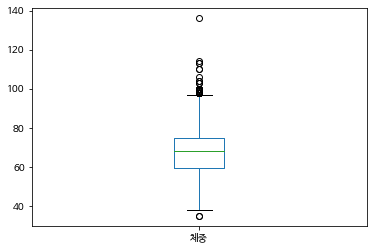

In [57]:
df2['체중'].plot.box()

In [58]:
df2[df2['체중']<40][['체중','신장', '연령']]

,체중,신장,연령
896,35.0,140,48
1166,38.0,162,32
1763,35.0,140,86


In [59]:
df2[df2['체중']>90][['체중','신장', '연령']].shape

(57, 3)

In [60]:
df2['심혈관질환'].unique()

array([0, 1])

<AxesSubplot:>

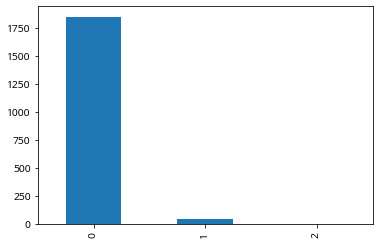

In [61]:
df2['우울증여부'].value_counts().plot.bar()

In [62]:
df2['연령'].describe()

count    1894.000000
mean       41.463569
std        13.444629
min        15.000000
25%        32.000000
50%        41.000000
75%        49.000000
max        86.000000
Name: 연령, dtype: float64

In [63]:
final['Location of herniation'].unique()

array([3, 4, 2, 5, 1])

In [64]:
final[(final['전방디스크높이(mm)']>final['후방디스크높이(mm)']) & (final['Seg Angle(raw)']<0)]['Location of herniation'].unique()

array([3, 1, 2])

In [65]:
final[(final['전방디스크높이(mm)']>final['후방디스크높이(mm)']) & (final['Seg Angle(raw)']>0)]['Location of herniation'].unique()

array([3, 4, 2, 5, 1])

In [66]:
final[(final['전방디스크높이(mm)']<final['후방디스크높이(mm)']) & (final['Seg Angle(raw)']<0)]['Location of herniation'].unique()

array([2])

In [67]:
final[(final['전방디스크높이(mm)']<final['후방디스크높이(mm)']) & (final['Seg Angle(raw)']>0)]['Location of herniation'].unique()

array([3, 2, 1, 4, 5])

In [68]:
from datetime import datetime, timedelta
def 요일(date_time):
    s = str(date_time)
    days = ['월','화','수','목','금','토','일']
    date = int(s[4:6])#year=int(s[0:4]), month=int(s[4:6]), day=int(s[6:8]))
    return date#days[date.weekday()]


<AxesSubplot:>

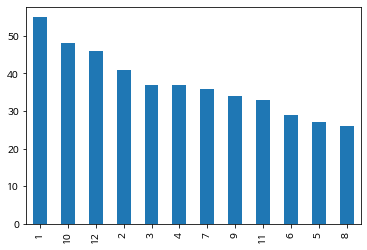

In [69]:
# final['입원일자'].apply(요일)
pd.value_counts(final[final['직업']=='사무직']['입원일자'].apply(요일).values).plot.bar()

<AxesSubplot:>

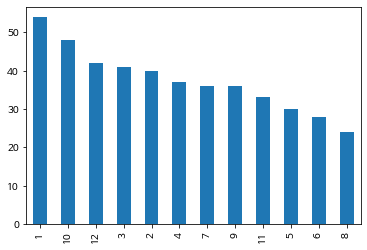

In [70]:
# final['입원일자'].apply(요일)
pd.value_counts(final[final['직업']=='사무직']['수술일자'].apply(요일).values).plot.bar()

<AxesSubplot:>

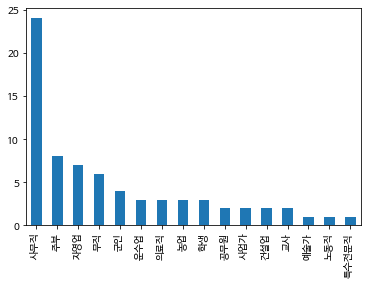

In [71]:
pd.value_counts(final[final['수술일자'].apply(요일)==8]['직업']).plot.bar()

In [72]:
type(final['입원일자'][0])

numpy.int64

In [73]:
# 연령별 수술시간 비교 -> 효과적인 수술 시간을 배치를 해여 의사의 피로도를 줄여 의료서비스 개선? 연령별로 수술에 걸리는 시간 비교하고 오래 걸리는 경우와 짧게 걸리는 경우를 잘 배치해서 의사 피로도를 줄인다. 
# 재발여부 직업군에 따라 / 기타 특징들


<AxesSubplot:xlabel='연령대', ylabel='통증기간(월)'>

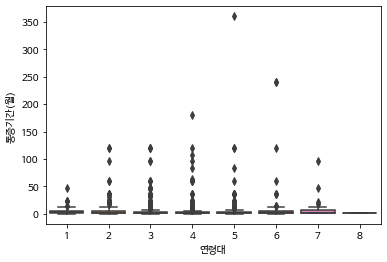

In [74]:
import seaborn as sns

# 연령대 통증기간 긴지? -> 참아온것 이를 개선할 수 있는가?
def 연령(age):
  return age//10

final['연령대'] = final['연령'].apply(연령)

sns.boxplot(x='연령대', y='통증기간(월)', data=final)

<AxesSubplot:xlabel='연령대'>

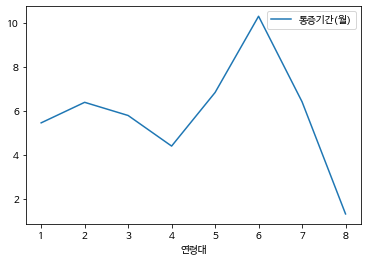

In [75]:
final[['통증기간(월)','연령대']].groupby('연령대').mean().plot.line()

<AxesSubplot:xlabel='연령', ylabel='통증기간(월)'>

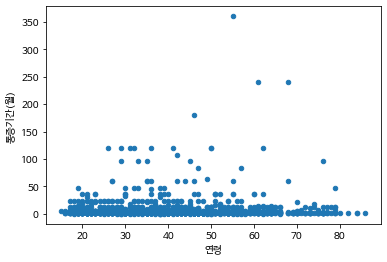

In [76]:
final.plot.scatter(x='연령',y='통증기간(월)')

<AxesSubplot:xlabel='재발여부', ylabel='수술시간'>

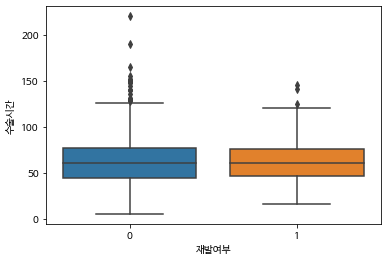

In [77]:
sns.boxplot(x='재발여부', y='수술시간', data=final)

<AxesSubplot:xlabel='빈혈여부', ylabel='수술시간'>

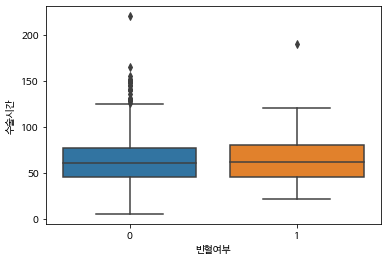

In [78]:
sns.boxplot(x='빈혈여부', y='수술시간', data=final)

In [79]:
final.columns

Index(['환자ID', '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증', 'Large Lymphocyte',
       'Location of herniation', 'ODI', '가족력', '간질성폐질환', '고혈압여부', '과거수술횟수',
       '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별', '스테로이드치료', '신부전여부', '신장', '심혈관질환',
       '암발병여부', '연령', '우울증여부', '입원기간', '입원일자', '종양진행여부', '직업', '체중', '퇴원일자',
       '헤모글로빈수치', '혈전합병증여부', '환자통증정도', '흡연여부', '통증기간(월)', '수술기법', '수술시간',
       '수술실패여부', '수술일자', '재발여부', '혈액형', 'SS', '연령대'],
      dtype='object')

In [80]:
from datetime import datetime, timedelta
def 연도(date_time):
    s = str(date_time)
    days = ['월','화','수','목','금','토','일']
    date = int(s[:4])#year=int(s[0:4]), month=int(s[4:6]), day=int(s[6:8]))
    return date#days[date.weekday()]


<AxesSubplot:xlabel='연도'>

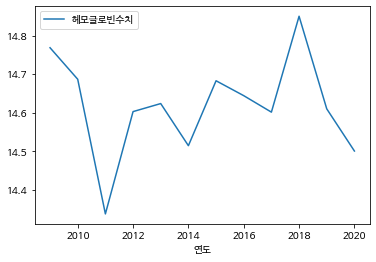

In [81]:
# 헤모글로빈 수치 & 혈액팩 -> 수혈팩 재고 관리?
final['연도'] = final['수술일자'].apply(연도)
final[['연도','헤모글로빈수치']].groupby('연도').mean().plot.line()

<AxesSubplot:xlabel='혈액형'>

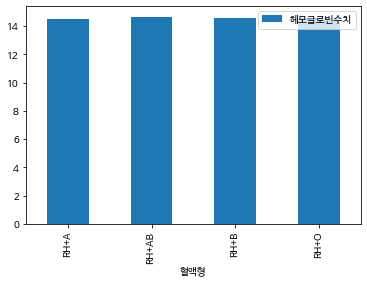

In [82]:
final[['헤모글로빈수치','혈액형']].groupby('혈액형').mean().plot.bar()

In [83]:
df = pd.DataFrame()
df['전체'] = final[['직업','재발여부']].groupby('직업').count()['재발여부']
df['재발'] = final[final['재발여부']==1][['직업','재발여부']].groupby('직업').count()['재발여부']

In [84]:
df = df.fillna(0)
pd.DataFrame(df['재발']/df['전체']).sort_values(by=0,ascending=False)

,0
직업,
건설업,0.235294
운동선수,0.214286
교사,0.200000
공무원,0.176471
의료직,0.175000
자영업,0.169591
사무직,0.135857
사업가,0.128205
노동직,0.119048


In [85]:
# 병의 유무에 따라 통증정도
['환자ID', '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증', 'Large Lymphocyte',
       'Location of herniation', 'ODI', '가족력', '간질성폐질환', '고혈압여부', '과거수술횟수',
       '당뇨여부', '말초동맥질환여부', '빈혈여부', '성별', '스테로이드치료', '신부전여부', '신장', '심혈관질환',
       '암발병여부', '연령', '우울증여부', '입원기간', '입원일자', '종양진행여부', '직업', '체중', '퇴원일자',
       '헤모글로빈수치', '혈전합병증여부', '환자통증정도', '흡연여부', '통증기간(월)', '수술기법', '수술시간',
       '수술실패여부', '수술일자', '재발여부', '혈액형', 'SS', '연령대']

['환자ID',
 '전방디스크높이(mm)',
 '후방디스크높이(mm)',
 '지방축적도',
 'Instability',
 'MF + ES',
 'Modic change',
 'PI',
 'PT',
 'Seg Angle(raw)',
 'Vaccum disc',
 '골밀도',
 '디스크단면적',
 '디스크위치',
 '척추이동척도',
 '척추전방위증',
 'Large Lymphocyte',
 'Location of herniation',
 'ODI',
 '가족력',
 '간질성폐질환',
 '고혈압여부',
 '과거수술횟수',
 '당뇨여부',
 '말초동맥질환여부',
 '빈혈여부',
 '성별',
 '스테로이드치료',
 '신부전여부',
 '신장',
 '심혈관질환',
 '암발병여부',
 '연령',
 '우울증여부',
 '입원기간',
 '입원일자',
 '종양진행여부',
 '직업',
 '체중',
 '퇴원일자',
 '헤모글로빈수치',
 '혈전합병증여부',
 '환자통증정도',
 '흡연여부',
 '통증기간(월)',
 '수술기법',
 '수술시간',
 '수술실패여부',
 '수술일자',
 '재발여부',
 '혈액형',
 'SS',
 '연령대']

In [86]:
dis = ['척추전방위증','간질성폐질환','고혈압여부','당뇨여부','말초동맥질환여부','빈혈여부','신부전여부','심혈관질환','암발병여부','우울증여부','종양진행여부','혈전합병증여부']


<AxesSubplot:ylabel='Frequency'>

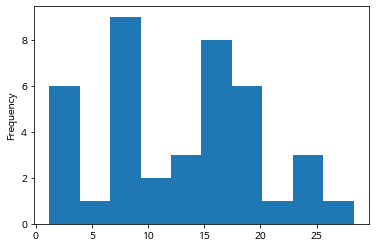

In [87]:
# pi, 척추이동척도 extremely up, down
final[(final['척추이동척도']=='Extremely down')]['PT'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

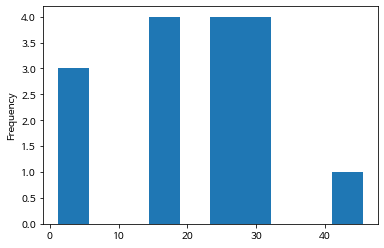

In [88]:
final[(final['척추이동척도']=='Extremely up')]['PT'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

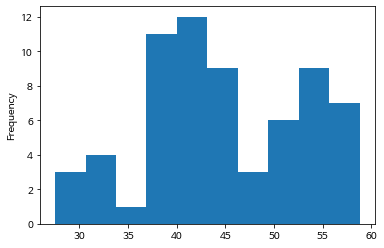

In [89]:
final[(final['척추이동척도']=='Up')]['PI'].plot.hist()

<AxesSubplot:>

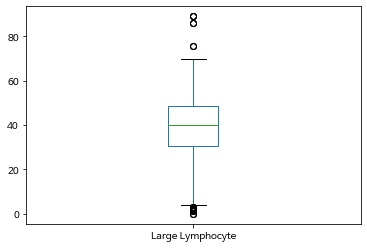

In [90]:
df2['Large Lymphocyte'].plot.box()

In [91]:
df2['Large Lymphocyte'].describe() # 0인 값? & 89?

count    1894.000000
mean       39.270750
std        13.675874
min         0.000000
25%        30.700000
50%        40.200000
75%        48.600000
max        89.000000
Name: Large Lymphocyte, dtype: float64

In [92]:
df2[df2['ODI']>70]

,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,말초동맥질환여부,...,입원일자,종양진행여부,직업,체중,퇴원일자,헤모글로빈수치,혈전합병증여부,환자통증정도,흡연여부,통증기간(월)


In [93]:
df1['환자ID']

0          1PT
1          2PT
2          3PT
3          4PT
4          5PT
         ...  
1889    1890PT
1890    1891PT
1891    1892PT
1892    1893PT
1893    1894PT
Name: 환자ID, Length: 1894, dtype: object

In [94]:
# final.to_csv('total.csv',index=False)

## 데이터 분석 1

연령 별 

퇴원일자 - 입원일자 => '입원기간' 이게 제일 정확하다

In [96]:
final.info(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1894 entries, 0 to 1893
Data columns (total 54 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   환자ID                    1894 non-null   object 
 1   전방디스크높이(mm)             1894 non-null   float64
 2   후방디스크높이(mm)             1894 non-null   float64
 3   지방축적도                   1891 non-null   float64
 4   Instability             1894 non-null   int64  
 5   MF + ES                 1894 non-null   float64
 6   Modic change            1894 non-null   int64  
 7   PI                      1890 non-null   float64
 8   PT                      1890 non-null   float64
 9   Seg Angle(raw)          1893 non-null   float64
 10  Vaccum disc             1894 non-null   int64  
 11  골밀도                     998 non-null    float64
 12  디스크단면적                  1893 non-null   float64
 13  디스크위치                   1894 non-null   int64  
 14  척추이동척도                  1894 non-null   

In [97]:
final['입원일자']

0       20190713
1       20190715
2       20190729
3       20190731
4       20190903
          ...   
1889    20170407
1890    20170426
1891    20170410
1892    20170408
1893    20170412
Name: 입원일자, Length: 1894, dtype: int64

In [98]:
# final['퇴원일자_1'] = pd.to_datetime(final['퇴원일자'], format = '%y/%m/%d')

In [99]:
final['입원일자(date)'] = pd.to_datetime(final['입원일자'], format='%Y%m%d')
final['퇴원일자(date)'] = pd.to_datetime(final['퇴원일자'], format='%Y%m%d')

In [100]:
final['입원기간']= final['퇴원일자(date)'] - final['입원일자(date)']

In [101]:
def func1(row):
    return int(str(row).split(' ')[0])

final['입원기간(int)'] = final['입원기간'].apply(func1)

In [102]:
cond1 = (final['입원기간(int)']>0)
final_1 = final.loc[cond1]

In [103]:
final_1.pivot_table(index='연령대',values='입원기간(int)'
                  ,aggfunc=['mean','min','max']).round(1)

,mean,min,max
,입원기간(int),입원기간(int),입원기간(int)
연령대,,,
1,2.3,1,17
2,9.7,1,1125
3,6.5,1,674
4,3.0,1,217
5,4.1,1,177
6,7.0,1,318
7,10.1,1,173
8,8.6,2,27


a  : 1,3,2,4,5 -> 평균 :3 
b  : 1,3,2,4,1000 -> 평균 :202 

In [128]:
from scipy import stats
from scipy.stats import shapiro , normaltest , anderson , kstest
# 집단간 비교 (X:범주 / Y:연속)
#1. 연속형이 정규분포를 띄는가 
# 귀무 : 해당 분포는 정규분포이다. 
# 대립 : 해당 분포는 정규분포가 아니다. 
stats.normaltest(final_1['입원기간(int)'])
# P.value < 0.05 / 대립가설 참 / 해당 분포는 정규분포가 아니다. 

NormaltestResult(statistic=4068.0756431592235, pvalue=0.0)

In [129]:
# 2. 비모수 검정
# 귀무 : 연령대 별 입원기간의 차이가 없다.
# 대립 : 연령대 별 입원기간의 차이가 있다.
cond1 = (final_1['연령대']==2)

df1_20 = final_1.loc[cond1]
df1_non_20 = final_1.loc[~cond1]

In [130]:
stats.ranksums(df1_20['입원기간(int)'], df1_non_20['입원기간(int)'])

RanksumsResult(statistic=-0.39062368311301005, pvalue=0.6960754172159893)

In [131]:
# 귀무 : 연령대 별 입원기간의 차이가 없다.

<AxesSubplot:xlabel='연령대', ylabel='입원기간(int)'>

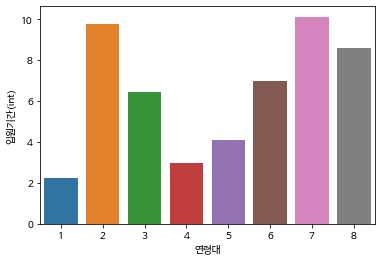

In [132]:
sns.barplot(data=final_1, x='연령대',y='입원기간(int)',ci=None)

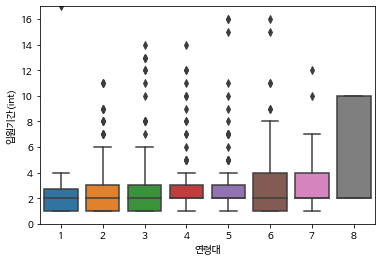

In [133]:
sns.boxplot(data=final_1, x='연령대',y='입원기간(int)')
plt.ylim(0,17)
plt.show()

In [134]:
cond1 = (final_1['연령대'] == 1 | 2 | 3)

In [135]:
df1_till30 = final_1.loc[cond1]
df1_non_till30 = final_1.loc[~cond1]

In [136]:
stats.ranksums(df1_till30['입원기간(int)'], df1_non_till30['입원기간(int)'])

RanksumsResult(statistic=-0.9838806825763513, pvalue=0.32517418279570576)

In [137]:
# 귀무 : 연령대 별 입원기간의 차이가 없다.

In [138]:
final_1.groupby('연령대').count()

,환자ID,전방디스크높이(mm),후방디스크높이(mm),지방축적도,Instability,MF + ES,Modic change,PI,PT,Seg Angle(raw),...,수술시간,수술실패여부,수술일자,재발여부,혈액형,SS,연도,입원일자(date),퇴원일자(date),입원기간(int)
연령대,,,,,,,,,,,,,,,,,,,,,
1,66,66,66,66,66,66,66,66,66,66,...,63,66,66,66,66,66,66,66,66,66
2,317,317,317,316,317,317,317,315,315,317,...,302,317,317,317,317,315,317,317,317,317
3,450,450,450,450,450,450,450,449,449,450,...,440,450,450,450,450,449,450,450,450,450
4,560,560,560,559,560,560,560,559,559,560,...,550,560,560,560,560,559,560,560,560,560
5,258,258,258,258,258,258,258,258,258,258,...,248,258,258,258,258,258,258,258,258,258
6,108,108,108,108,108,108,108,108,108,108,...,105,108,108,108,108,108,108,108,108,108
7,57,57,57,56,57,57,57,57,57,57,...,57,57,57,57,57,57,57,57,57,57
8,5,5,5,5,5,5,5,5,5,5,...,3,5,5,5,5,5,5,5,5,5


**Insight: 연령별 입원일자를 살펴 보았는데, 의외로 20대의 입원기간이 길다.
- 평균 값이므로 절대 인원가 비교해보면 유의미한 연령대는 20대 (317명-전체의 17.4%)

In [139]:
66+317+450+560+258+108+57+5

1821

In [140]:
317/1821 * 100

17.40801757276222

## 데이터 분석 2

수술 기법이 없는 사람들에 대한 특징 조사
- 개복하면 아무 문제가 없어서 수술 안한 사람들일 수도 있어서

In [141]:
final.head()

,환자ID,전방디스크높이(mm),후방디스크높이(mm),지방축적도,Instability,MF + ES,Modic change,PI,PT,Seg Angle(raw),...,수술실패여부,수술일자,재발여부,혈액형,SS,연령대,연도,입원일자(date),퇴원일자(date),입원기간(int)
0,1PT,16.1,12.3,282.3,0,1824.6,3,51.6,36.6,14.4,...,0,20190715,0,RH+A,15.0,6,2019,2019-07-13,2019-07-16,3
1,2PT,13.7,6.4,177.3,0,1737.5,0,40.8,7.2,17.8,...,0,20190716,0,RH+A,33.6,4,2019,2019-07-15,2019-07-16,1
2,3PT,13.6,7.4,256.8,0,1188.5,0,67.5,27.3,10.2,...,0,20190731,0,RH+B,40.2,3,2019,2019-07-29,2019-08-01,3
3,4PT,10.6,7.3,250.1,0,2534.5,0,49.2,18.7,19.9,...,0,20190802,0,RH+O,30.5,4,2019,2019-07-31,2019-08-03,3
4,5PT,17.1,8.1,232.2,0,1840.6,0,58.8,14.7,5.2,...,0,20190906,0,RH+A,44.1,4,2019,2019-09-03,2019-09-07,4


In [142]:
final['수술기법'].uniquecond1 = (final['입원기간(int)']>0)
final_1 = final.loc[cond1]

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [163]:
surgery_o = final[final['수술기법'].notna()]

In [164]:
surgery_o

,환자ID,전방디스크높이(mm),후방디스크높이(mm),지방축적도,Instability,MF + ES,Modic change,PI,PT,Seg Angle(raw),...,수술실패여부,수술일자,재발여부,혈액형,SS,연령대,연도,입원일자(date),퇴원일자(date),입원기간(int)
0,1PT,16.1,12.3,282.3,0,1824.6,3,51.6,36.6,14.4,...,0,20190715,0,RH+A,15.0,6,2019,2019-07-13,2019-07-16,3
1,2PT,13.7,6.4,177.3,0,1737.5,0,40.8,7.2,17.8,...,0,20190716,0,RH+A,33.6,4,2019,2019-07-15,2019-07-16,1
2,3PT,13.6,7.4,256.8,0,1188.5,0,67.5,27.3,10.2,...,0,20190731,0,RH+B,40.2,3,2019,2019-07-29,2019-08-01,3
3,4PT,10.6,7.3,250.1,0,2534.5,0,49.2,18.7,19.9,...,0,20190802,0,RH+O,30.5,4,2019,2019-07-31,2019-08-03,3
4,5PT,17.1,8.1,232.2,0,1840.6,0,58.8,14.7,5.2,...,0,20190906,0,RH+A,44.1,4,2019,2019-09-03,2019-09-07,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1870,1871PT,8.5,9.0,182.5,0,1919.5,0,31.7,14.9,9.6,...,0,20170306,0,RH+O,16.8,2,2017,2017-03-02,2017-03-13,11
1872,1873PT,11.6,7.2,94.2,0,2398.9,0,39.4,8.0,19.5,...,0,20170316,0,RH+A,31.4,2,2017,2017-03-16,2017-03-17,1
1874,1875PT,11.1,7.6,126.1,1,1970.3,2,43.6,17.7,9.1,...,0,20170929,0,RH+B,25.9,4,2017,2017-09-28,2017-09-30,2
1879,1880PT,12.7,8.7,207.4,0,2220.1,0,34.0,19.0,6.0,...,0,20170605,0,RH+B,15.0,2,2017,2017-06-04,2017-06-06,2


In [165]:
final['수술기법1'] = final['수술기법'].fillna(value = 0)

In [166]:
final

,환자ID,전방디스크높이(mm),후방디스크높이(mm),지방축적도,Instability,MF + ES,Modic change,PI,PT,Seg Angle(raw),...,수술일자,재발여부,혈액형,SS,연령대,연도,입원일자(date),퇴원일자(date),입원기간(int),수술기법1
0,1PT,16.1,12.3,282.3,0,1824.6,3,51.6,36.6,14.4,...,20190715,0,RH+A,15.0,6,2019,2019-07-13,2019-07-16,3,TELD
1,2PT,13.7,6.4,177.3,0,1737.5,0,40.8,7.2,17.8,...,20190716,0,RH+A,33.6,4,2019,2019-07-15,2019-07-16,1,TELD
2,3PT,13.6,7.4,256.8,0,1188.5,0,67.5,27.3,10.2,...,20190731,0,RH+B,40.2,3,2019,2019-07-29,2019-08-01,3,TELD
3,4PT,10.6,7.3,250.1,0,2534.5,0,49.2,18.7,19.9,...,20190802,0,RH+O,30.5,4,2019,2019-07-31,2019-08-03,3,TELD
4,5PT,17.1,8.1,232.2,0,1840.6,0,58.8,14.7,5.2,...,20190906,0,RH+A,44.1,4,2019,2019-09-03,2019-09-07,4,TELD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,1890PT,17.0,10.7,237.5,0,2795.7,2,59.5,23.0,21.8,...,20170407,0,RH+A,36.5,5,2017,2017-04-07,2017-04-08,1,0
1890,1891PT,9.4,8.2,288.0,0,1473.0,0,47.7,20.2,5.0,...,20170427,0,RH+B,27.5,4,2017,2017-04-26,2017-04-29,3,0
1891,1892PT,13.5,5.5,148.5,0,3864.1,0,44.6,15.0,17.4,...,20170411,0,RH+O,29.6,6,2017,2017-04-10,2017-04-12,2,IELD
1892,1893PT,14.0,10.0,89.0,0,2481.8,2,32.2,11.1,17.7,...,20170410,0,RH+A,21.1,2,2017,2017-04-08,2017-04-11,3,0


- 수술기법이 0일때의 PI(평균),골밀도,지방축적도,스테로이드치료여부(0,1)(범주형), segangle
- 수술기법이 0이 아닐때의 PI, 골밀도, 스테로이드치료여부(0,1)

In [167]:
cond1 = (final['수술기법1']==0)
final_1 = final.loc[cond1]

In [168]:
final_1.pivot_table(index='수술기법1',values='PI'
                  ,aggfunc=['mean','min','max'])

,mean,min,max
,PI,PI,PI
수술기법1,,,
0,45.045679,23.0,59.9


In [169]:
cond2 = (final['수술기법1']!=0)
final_2 = final.loc[cond2]

In [170]:
final_2.pivot_table(index='수술기법1',values='PI'
                  ,aggfunc=['mean','min','max'])

,mean,min,max
,PI,PI,PI
수술기법1,,,
IELD,42.492086,14.0,78.0
TELD,47.010120,11.9,559.0


In [171]:
final_1.pivot_table(index='수술기법1',values='골밀도'
                  ,aggfunc=['mean','min','max'])

,mean,min,max
,골밀도,골밀도,골밀도
수술기법1,,,
0,-1.5505,-2.46,-0.6


In [172]:
final_2.pivot_table(index='수술기법1',values='골밀도'
                  ,aggfunc=['mean','min','max'])

,mean,min,max
,골밀도,골밀도,골밀도
수술기법1,,,
IELD,-1.473235,-2.46,1.14
TELD,-1.507989,-2.84,1.70


In [173]:
final_1.sum()

환자ID                      152PT341PT451PT452PT453PT454PT455PT456PT457PT4...
전방디스크높이(mm)                                                           960.5
후방디스크높이(mm)                                                          675.93
지방축적도                                                              16610.88
Instability                                                               4
MF + ES                                                           182141.95
Modic change                                                             42
PI                                                                   3648.7
PT                                                                   1232.5
Seg Angle(raw)                                                       1396.9
Vaccum disc                                                               8
골밀도                                                                  -62.02
디스크단면적                                                            160484.99
디스크위치       

#### SEG ANGLE - 유의미해보임 (근거 더 필요)

In [174]:
final_1.pivot_table(index='수술기법1',values='Seg Angle(raw)'
                  ,aggfunc=['mean','min','max'])

,mean,min,max
,Seg Angle(raw),Seg Angle(raw),Seg Angle(raw)
수술기법1,,,
0,17.245679,0.3,36.3


(수술일자는 있음) 수술기법이 공백인 사람들 70명

In [175]:
final_2.pivot_table(index='수술기법1',values='Seg Angle(raw)'
                  ,aggfunc=['mean','min','max'])

,mean,min,max
,Seg Angle(raw),Seg Angle(raw),Seg Angle(raw)
수술기법1,,,
IELD,18.079286,0.4,36.8
TELD,14.959366,-27.4,165.0


- IELD :
- TELD : 

- 연속형(Y): Seg Angle
- 범주형(X): 수술기법1

연속성 변수인 Y의 정규성 검정

정규성 검정하기

In [176]:
df1 = final_2[final_2['수술기법1'] == 'TELD']

In [177]:
df1_ = pd.DataFrame(df1['Seg Angle(raw)'])

In [178]:
df1_.isnull().sum()

Seg Angle(raw)    1
dtype: int64

<AxesSubplot:>

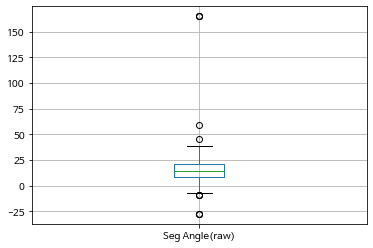

In [179]:
df1_.boxplot()

In [180]:
df1_[df1_['Seg Angle(raw)']<0]

,Seg Angle(raw)
55,-1.8
206,-9.4
397,-4.9
408,-27.4
525,-1.8
676,-9.4
867,-4.9
878,-27.4
1034,-5.0
1066,-1.8


In [181]:
df1_.dropna(inplace=True)

In [182]:
df1_.isnull().sum()

Seg Angle(raw)    0
dtype: int64

In [183]:
df2 = final_2[final_2['수술기법1'] == 'IELD']

In [184]:
df2_ = pd.DataFrame(df2['Seg Angle(raw)'])

In [185]:
df2_.count() 

Seg Angle(raw)    140
dtype: int64

<AxesSubplot:>

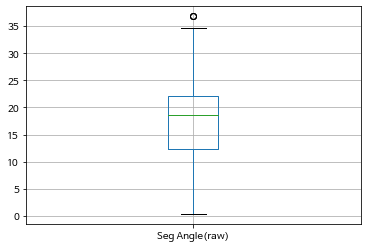

In [186]:
df2_.boxplot()

In [187]:
df2_.isnull().sum()

Seg Angle(raw)    0
dtype: int64

In [188]:
from scipy import stats

In [189]:
t_result = stats.ttest_ind(df1_, df2_)

In [190]:
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)

print("2_sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

2_sample t-test
t:[-3.399]
p:[0.001]


스테로이드는 count하자

#### 스테로이드 - 유의미해보임 (근거 더 필요)

In [191]:
final_1.sum()

환자ID                      152PT341PT451PT452PT453PT454PT455PT456PT457PT4...
전방디스크높이(mm)                                                           960.5
후방디스크높이(mm)                                                          675.93
지방축적도                                                              16610.88
Instability                                                               4
MF + ES                                                           182141.95
Modic change                                                             42
PI                                                                   3648.7
PT                                                                   1232.5
Seg Angle(raw)                                                       1396.9
Vaccum disc                                                               8
골밀도                                                                  -62.02
디스크단면적                                                            160484.99
디스크위치       

In [192]:
freq = final['수술기법'].value_counts()
freq

TELD    1673
IELD     140
Name: 수술기법, dtype: int64

In [193]:
freq = final_1['수술기법'].value_counts()
freq

Series([], Name: 수술기법, dtype: int64)

In [194]:
final_2

,환자ID,전방디스크높이(mm),후방디스크높이(mm),지방축적도,Instability,MF + ES,Modic change,PI,PT,Seg Angle(raw),...,수술일자,재발여부,혈액형,SS,연령대,연도,입원일자(date),퇴원일자(date),입원기간(int),수술기법1
0,1PT,16.1,12.3,282.3,0,1824.6,3,51.6,36.6,14.4,...,20190715,0,RH+A,15.0,6,2019,2019-07-13,2019-07-16,3,TELD
1,2PT,13.7,6.4,177.3,0,1737.5,0,40.8,7.2,17.8,...,20190716,0,RH+A,33.6,4,2019,2019-07-15,2019-07-16,1,TELD
2,3PT,13.6,7.4,256.8,0,1188.5,0,67.5,27.3,10.2,...,20190731,0,RH+B,40.2,3,2019,2019-07-29,2019-08-01,3,TELD
3,4PT,10.6,7.3,250.1,0,2534.5,0,49.2,18.7,19.9,...,20190802,0,RH+O,30.5,4,2019,2019-07-31,2019-08-03,3,TELD
4,5PT,17.1,8.1,232.2,0,1840.6,0,58.8,14.7,5.2,...,20190906,0,RH+A,44.1,4,2019,2019-09-03,2019-09-07,4,TELD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1870,1871PT,8.5,9.0,182.5,0,1919.5,0,31.7,14.9,9.6,...,20170306,0,RH+O,16.8,2,2017,2017-03-02,2017-03-13,11,TELD
1872,1873PT,11.6,7.2,94.2,0,2398.9,0,39.4,8.0,19.5,...,20170316,0,RH+A,31.4,2,2017,2017-03-16,2017-03-17,1,TELD
1874,1875PT,11.1,7.6,126.1,1,1970.3,2,43.6,17.7,9.1,...,20170929,0,RH+B,25.9,4,2017,2017-09-28,2017-09-30,2,TELD
1879,1880PT,12.7,8.7,207.4,0,2220.1,0,34.0,19.0,6.0,...,20170605,0,RH+B,15.0,2,2017,2017-06-04,2017-06-06,2,TELD


## 데이터 분석 3

In [195]:
from datetime import datetime, timedelta
def 요일(date_time):
    s = str(date_time)
    days = ['월','화','수','목','금','토','일']
    date = int(s[4:6])#datetime(year=int(s[0:4]), month=int(s[4:6]), day=int(s[6:8]))
    return date#days[date.weekday()]


In [196]:
pd.value_counts(final[final['직업']=='사무직'].apply(요일).values()

SyntaxError: unexpected EOF while parsing (<ipython-input-196-423e610939e0>, line 1)

In [198]:
final['수술일자(date)'] = pd.to_datetime(final['수술일자'], format='%Y%m%d')

In [199]:
final['수술일자(date)']

0      2019-07-15
1      2019-07-16
2      2019-07-31
3      2019-08-02
4      2019-09-06
          ...    
1889   2017-04-07
1890   2017-04-27
1891   2017-04-11
1892   2017-04-10
1893   2017-04-12
Name: 수술일자(date), Length: 1894, dtype: datetime64[ns]

In [200]:
final['수술일자(month)'] = final['수술일자(date)'].dt.month

In [201]:
# def func1(row):
#     return int(str(row).split(' ')[0])

# final['입원기간(int)'] = final['입원기간'].apply(func1)

<AxesSubplot:ylabel='Frequency'>

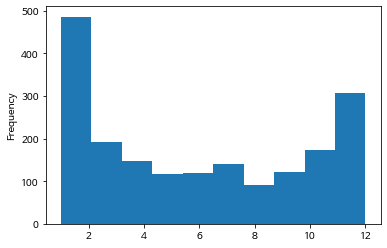

In [202]:
final['수술일자(month)'].plot.hist()

In [203]:
final.groupby(by=['수술일자(month)'], as_index=False).count()

,수술일자(month),환자ID,전방디스크높이(mm),후방디스크높이(mm),지방축적도,Instability,MF + ES,Modic change,PI,PT,...,재발여부,혈액형,SS,연령대,연도,입원일자(date),퇴원일자(date),입원기간(int),수술기법1,수술일자(date)
0,1,285,285,285,285,285,285,285,285,285,...,285,285,285,285,285,285,285,285,285,285
1,2,201,201,201,201,201,201,201,200,200,...,201,201,200,201,201,201,201,201,201,201
2,3,192,192,192,192,192,192,192,191,191,...,192,192,191,192,192,192,192,192,192,192
3,4,148,148,148,148,148,148,148,148,148,...,148,148,148,148,148,148,148,148,148,148
4,5,116,116,116,115,116,116,116,116,116,...,116,116,116,116,116,116,116,116,116,116
5,6,119,119,119,119,119,119,119,119,119,...,119,119,119,119,119,119,119,119,119,119
6,7,140,140,140,140,140,140,140,139,139,...,140,140,139,140,140,140,140,140,140,140
7,8,91,91,91,91,91,91,91,91,91,...,91,91,91,91,91,91,91,91,91,91
8,9,121,121,121,120,121,121,121,120,120,...,121,121,120,121,121,121,121,121,121,121
9,10,173,173,173,173,173,173,173,173,173,...,173,173,173,173,173,173,173,173,173,173


In [204]:
285+201+192+148+116+119+140+91+121+173+131+177

1894

In [205]:
# final['입원일자'].apply(요일)
pd.value_counts(final[final['직업']=='사무직']['입원일자'].apply(요일).values)

1     55
10    48
12    46
2     41
3     37
4     37
7     36
9     34
11    33
6     29
5     27
8     26
dtype: int64

In [206]:
55+48+46+41+37+37+36+34+33+29+27+26

449

In [207]:
import seaborn as sns

# 연령대 통증기간 긴지? -> 참아온것 이를 개선할 수 있는가?
def 연령(age):
  return age//10

final['연령대'] = final['연령'].apply(연령)

In [215]:
final

,환자ID,전방디스크높이(mm),후방디스크높이(mm),지방축적도,Instability,MF + ES,Modic change,PI,PT,Seg Angle(raw),...,혈액형,SS,연령대,연도,입원일자(date),퇴원일자(date),입원기간(int),수술기법1,수술일자(date),수술일자(month)
0,1PT,16.1,12.3,282.3,0,1824.6,3,51.6,36.6,14.4,...,RH+A,15.0,6,2019,2019-07-13,2019-07-16,3,TELD,2019-07-15,7
1,2PT,13.7,6.4,177.3,0,1737.5,0,40.8,7.2,17.8,...,RH+A,33.6,4,2019,2019-07-15,2019-07-16,1,TELD,2019-07-16,7
2,3PT,13.6,7.4,256.8,0,1188.5,0,67.5,27.3,10.2,...,RH+B,40.2,3,2019,2019-07-29,2019-08-01,3,TELD,2019-07-31,7
3,4PT,10.6,7.3,250.1,0,2534.5,0,49.2,18.7,19.9,...,RH+O,30.5,4,2019,2019-07-31,2019-08-03,3,TELD,2019-08-02,8
4,5PT,17.1,8.1,232.2,0,1840.6,0,58.8,14.7,5.2,...,RH+A,44.1,4,2019,2019-09-03,2019-09-07,4,TELD,2019-09-06,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,1890PT,17.0,10.7,237.5,0,2795.7,2,59.5,23.0,21.8,...,RH+A,36.5,5,2017,2017-04-07,2017-04-08,1,0,2017-04-07,4
1890,1891PT,9.4,8.2,288.0,0,1473.0,0,47.7,20.2,5.0,...,RH+B,27.5,4,2017,2017-04-26,2017-04-29,3,0,2017-04-27,4
1891,1892PT,13.5,5.5,148.5,0,3864.1,0,44.6,15.0,17.4,...,RH+O,29.6,6,2017,2017-04-10,2017-04-12,2,IELD,2017-04-11,4
1892,1893PT,14.0,10.0,89.0,0,2481.8,2,32.2,11.1,17.7,...,RH+A,21.1,2,2017,2017-04-08,2017-04-11,3,0,2017-04-10,4


### 년도 별 / 연령 별 방문자 수

In [211]:
final['연령대'].unique

<bound method Series.unique of 0       6
1       4
2       3
3       4
4       4
       ..
1889    5
1890    4
1891    6
1892    2
1893    3
Name: 연령대, Length: 1894, dtype: int64>

In [213]:
df_1 = [final['연령대'] == '1']
df_2 = [final['연령대'] == '2']
df_3 = [final['연령대'] == '3']
df_4 = [final['연령대'] == '4']
df_5 = [final['연령대'] == '5']
df_6 = [final['연령대'] == '6']
df_7 = [final['연령대'] == '7']
df_8 = [final['연령대'] == '8']

In [217]:
#2020년 연령대

In [ ]:
#2019년 연령대

In [ ]:
#2018년 연령대

In [223]:
final.head()
final['count'] = 1 

In [224]:
def func1(row):
    return str(row) +'0대'

final['연령대(object)'] = final['연령대'].apply(func1)

<AxesSubplot:xlabel='연령대(object)', ylabel='count'>

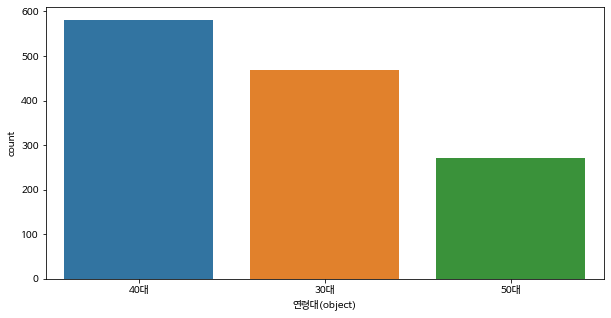

In [225]:
cond1 = (final['연령대(object)']=='30대')|(final['연령대(object)']=='40대')|(final['연령대(object)']=='50대')


plt.figure(figsize=[10,5])
sns.barplot(data=final.loc[cond1], x='연령대(object)',y='count',estimator=sum, ci=None)

<AxesSubplot:xlabel='연령대(object)', ylabel='count'>

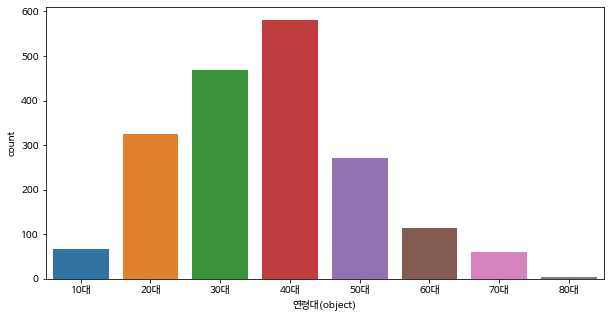

In [226]:
plt.figure(figsize=[10,5])
sns.barplot(data=final, x='연령대(object)',y='count',estimator=sum, ci=None,
           order=['10대','20대','30대','40대','50대','60대','70대','80대'])